<a href="https://colab.research.google.com/github/maxethan2/Machine-Learning-Assignment-2/blob/main/ML_Assignment2_Max_Haviv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt



def normalize_min_max(data):
  min_vals = np.min(data, axis=0)
  max_vals = np.max(data, axis=0)
  normalized_data = (data - min_vals) / (max_vals - min_vals)
  return normalized_data, min_vals, max_vals



data = load_breast_cancer()
list(data.target_names)
['malignant', 'benign']

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

# normalize the data to make sure that numbers dont get too big to work with
x_train, min_vals, max_vals = normalize_min_max(x_train)
x_test, min_vals, max_vals = normalize_min_max(x_test)





# **Logistic Regression**

In [2]:
@staticmethod
def sigmoid(x):
  return 1 / (1 + np.exp(-x))     # Define sigmoid function

@staticmethod
def sigmoid_derivative(x):
  return x * (1 - x)

class logisticRegression:

  def __init__(self):
    self.learning_rate = 0.05
    # initialize array of weights between -1 and 1
    self.weights = np.random.uniform(low = -0.5, high = 0.5, size=30)
    # single bias weight between -1 and 1
    self.bias = np.random.uniform(low = -1, high = 1)

  # take a single row of data and predict 1 or 0
  def predict(self, data):
    x = np.dot(data, self.weights) + self.bias
    x = sigmoid(x)
    if (x >= 0.5):
      return (1, x)
    else:
      return (0, x)

  def train(self, data, target):
    guessed, actual = self.predict(data)

    # if correct no need to adjust weights
    if (target == guessed):
      return

    # calculate the error
    error = np.multiply(actual, (target - actual))

    # calculate the gradient
    gradient_weights = np.dot(data.T, error)
    gradient_bias = np.sum(error)

    # adjust weights and bias
    self.weights += self.learning_rate * gradient_weights
    self.bias += self.learning_rate * gradient_bias


[126, 126, 125, 128, 126, 129, 128, 116, 117, 131, 117, 124, 132, 123, 117, 131, 131, 122, 126, 132]
 Accuracy: 73.30409356725146%


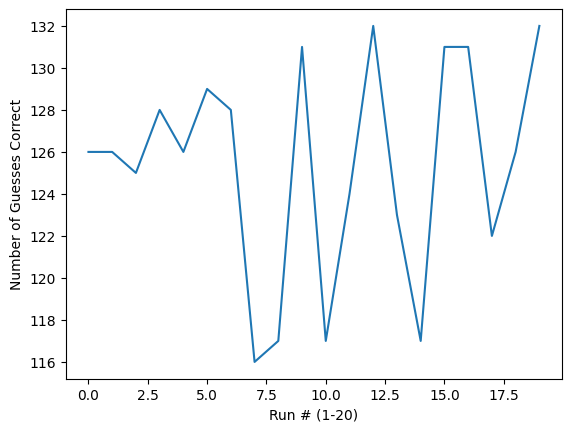

In [3]:
list_of_num_correct = []

num_runs = 20
for x in range(num_runs):
  lr = logisticRegression()

  # train the model
  for i in range(1000):
    for j in range(len(x_train)):
      lr.train(x_train[j], y_train[j])


  # test the model
  num_correct = 0
  for i in range(len(x_test)):
    # predict using model
    guessed, actual = lr.predict(x_test[i])
    # check if the guess was correct
    if (guessed == y_test[i]):
      num_correct += 1
  list_of_num_correct.append(num_correct)

print(list_of_num_correct)

plt.xlabel(f"Run # (1-{num_runs})")
plt.ylabel("Number of Guesses Correct")
plt.plot(list_of_num_correct)

print(f" Accuracy: {sum(list_of_num_correct) / (len(list_of_num_correct) * 171) * 100}%")

# **Neural Network**

In [135]:
class NeuralNetwork():

  def __init__ (self, topology):
    r1, r2, r3 = topology
    self.epochs = 1000
    self.learning_rate = 0.05

    self.weights_input_hidden = np.random.uniform(low = -0.5, high = 0.5, size=(r1, r2))
    self.bias_input_hidden = np.random.uniform(low = -0.5, high = 0.5, size=(1, r2))

    self.weights_hidden_output = np.random.uniform(low = -0.5, high = 0.5, size=(r2, r3))
    self.bias_hidden_output = np.random.uniform(low = -0.5, high = 0.5, size=(1, r3))

  def propogate(self, inputs):
    self.input = inputs
    # dot inputs and weights to hidden layer
    self.hidden_output = np.dot(self.weights_input_hidden.T, inputs) + self.bias_input_hidden
    # activation function
    for i in range(len(self.hidden_output)):
      self.hidden_output[i] = sigmoid(self.hidden_output[i])

    # dot hidden outputs with weights to output
    self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
    # activation function
    for i in range(len(self.output)):
      self.output[i] = sigmoid(self.output[i])

    return self.output

  def backpropogate(self, target):
    inputs = self.input.reshape((30,1))

    # calculate the error for output
    output_error = target - self.output
    output_delta = self.learning_rate * sigmoid_derivative(output_error)

    # adjust weights between hidden and output
    self.weights_hidden_output += self.learning_rate * np.dot(self.hidden_output.T, output_delta)
    self.bias_hidden_output += self.learning_rate * np.sum(output_delta)

    # calculate the error for the hidden layer
    hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

    self.weights_input_hidden += self.learning_rate * np.dot(inputs, hidden_delta)
    self.bias_input_hidden += self.learning_rate * np.sum(hidden_delta)

  # convert raw predicted values into values that can be compared with testing and training data
  def predict(self, x):
    index = np.argmax(x[0])
    self.prediction = [0] * len(x[0])
    self.prediction[index] = 1
    return self.prediction



In [152]:
nn = NeuralNetwork((30,4,2))

list_of_num_correct = []
num_runs = 20

# running multiple times to get an overall accuracy
for y in range(num_runs):
  num_correct = 0
  # loop through every traning set
  for x in range(nn.epochs):
    for i in range(len(x_train)):
      output = nn.propogate(x_train[i])
      prediction = nn.predict(output)
      # check to see if output has predicted correctly
      if (y_train[i] == 1 and prediction != [1,0]): # [1,0]
        # backpropgate
        nn.backpropogate([1,0])
      elif (y_train[i] == 0 and prediction != [0,1]):
        # backpropogate
        nn.backpropogate([0,1])


  for i in range(len(x_test)):
    output = nn.propogate(x_test[i])
    prediction = nn.predict(output)

    if (y_test[i] == 1 and prediction == [1,0]):
      num_correct += 1
    elif (y_test[i] == 0 and prediction == [0,1]):
      num_correct += 1
  list_of_num_correct.append(num_correct)

print(list_of_num_correct)



[150, 153, 155, 155, 155, 155, 155, 155, 156, 156, 156, 156, 156, 154, 155, 158, 156, 155, 158, 158]


Average Accuracy over (20) runs: 90.84795321637426%

Max number correct: 158 Accuracy: 92.39766081871345%
Min number correct: 150 Accuracy: 87.71929824561403%


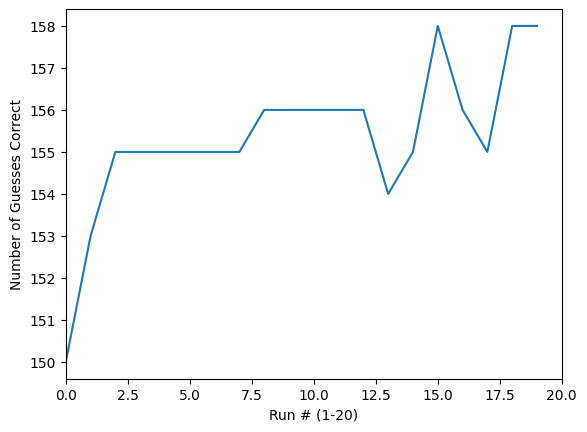

In [153]:
plt.xlabel(f"Run # (1-{num_runs})")
plt.ylabel("Number of Guesses Correct")
plt.plot(list_of_num_correct)

# plt.ylim(0, len(y_test))
plt.xlim(0,num_runs)

print(f"Average Accuracy over ({num_runs}) runs: {sum(list_of_num_correct) / (len(list_of_num_correct) * 171) * 100}%")
print()
print(f"Max number correct: {list_of_num_correct[np.argmax(list_of_num_correct)]} Accuracy: {list_of_num_correct[np.argmax(list_of_num_correct)]/171 * 100}%")
print(f"Min number correct: {list_of_num_correct[np.argmin(list_of_num_correct)]} Accuracy: {list_of_num_correct[np.argmin(list_of_num_correct)]/171 * 100}%")